# History of the NALCS
## Exploring NALCS data Pre-Franchising

Hello! Over the next couple of days I will be adding on to this Jupyter Noteboook and perform a light analysis on all things NALCS before franchising took place in 2013. All data has been webscraped from [Leaguepedia](https://lol.gamepedia.com/League_of_Legends_Esports_Wiki). To give some insight on integrity of the site, all games have their sources cited with the exact match page within league of legends website. Here is an example from the [2015 North American Summer Challenger Series](https://matchhistory.na.leagueoflegends.com/en/#match-details/FRA1TMNT1/700174?gameHash=473376a14662e0af&tab=overview). I simply found it easier to parse through Leaguepedia than go through every match history page.

Now with all that being said, let's get started! First we will look at historical Elo of all teams to officially settle the debate once and for all: Which team was the all time best team in NA history?

### Who is the best team of them all?
First thing we need to do is format our dataset to work well with the ELOTools file that @ccastle has created

In [13]:
import pandas as pd
import numpy as np
import datetime
#import matplotlib.pyplot as plt
#%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go

#created by @ccastle.
from ELOTools import *

history = pd.read_excel("NALCS_History.xlsx")
history.head(7)

ImportError: No module named 'plotly'

The only columns we are going to need are Date, Match of the Day (or in our case match of the season), Team A (Blue), Team B(Red), Winner

We are also going to add other columns to break down the data set a little bit more (such as patch)

In [3]:
my_elo_df = history[['Date', 'Match of the Season','Blue', 'Red', 'Winner' ]]

#change columns to fit the ELO tools file
my_elo_df.columns = ['Date', 'Match of the Day','Team A', 'Team B', 'Winner']

for i,k in my_elo_df.iterrows():
    if my_elo_df.loc[i,'Winner'] == 'blue':
        my_elo_df.set_value(i,'Winner', 'Team A')
    elif my_elo_df.loc[i,'Winner'] == 'red':
        my_elo_df.set_value(i,'Winner','Team B')
        
my_elo_df.head(7)

,Date,Match of the Day,Team A,Team B,Winner
0,2013-04-20,112,Team Vulcun,Team Curse,Team A
1,2013-04-20,111,compLexity Gaming,Team MRN,Team B
2,2013-04-20,110,Team Dignitas,Team SoloMid,Team B
3,2013-04-20,109,Good Game University,Counter Logic Gaming,Team A
4,2013-04-19,108,Team Dignitas,Team Vulcun,Team B
5,2013-04-19,107,Team SoloMid,Good Game University,Team A
6,2013-04-19,106,Team Curse,compLexity Gaming,Team B


Now that we have our dataframe all cleaned up, we can run compute_elo_table located in the ELO Tools file!

In [4]:
final_elo = compute_elo_table(my_elo_df)
final_elo.head(7)


,Date,Elo,Match Number,Team
0,2013-02-06,1000.0,0,Roar (Chinese Team)
1,2013-02-06,1000.0,0,Curse Academy
2,2013-02-06,1000.0,0,Immortals
3,2013-02-06,1000.0,0,eUnited
4,2013-02-06,1000.0,0,Gravity
5,2013-02-06,1000.0,0,Team Dragon Knights
6,2013-02-06,1000.0,0,NRG Esports


109


ValueError: could not convert string to float: '2015-01-30'

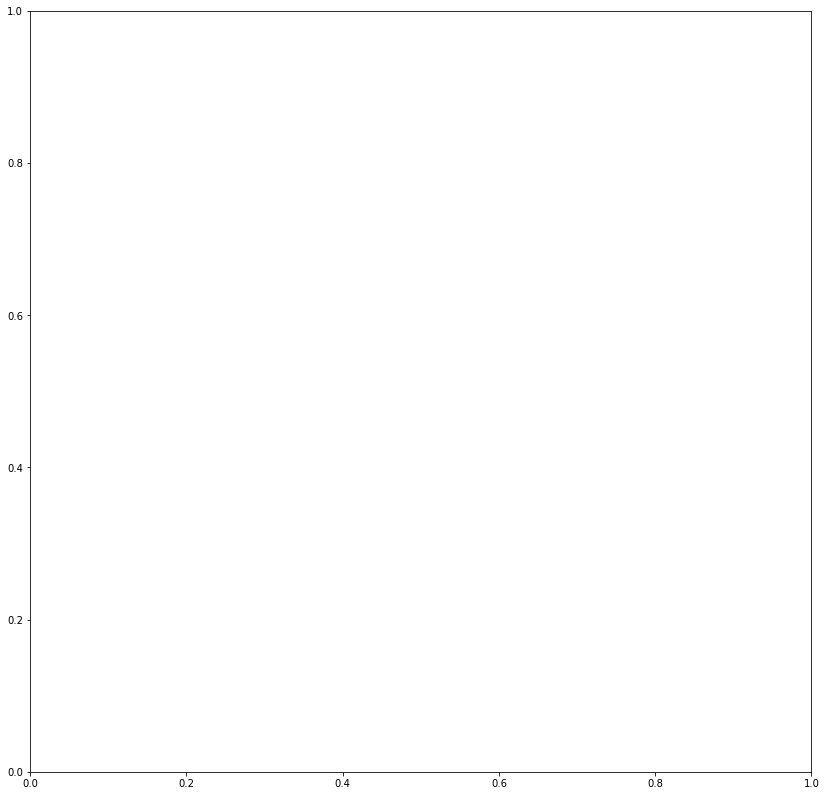

In [12]:
team_list = list(final_elo['Team'].unique())
print(len(team_list))

plt.figure(figsize=(14,14))
for team in team_list:
    plt.plot(final_elo[final_elo['Team'] == team]['Date'], final_elo[final_elo['Team'] == team]['Elo'] )
plt.show()